In [1]:
pip install pystac_client odc-stac

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 9.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.8 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 9.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 7.7 MB/s eta 0:00:0000:01:00:01
  Using cached zipp-3.17.0-py3-none-any.whl (7.4 kB)
Note: you may need to restart the kernel to use updated packages.


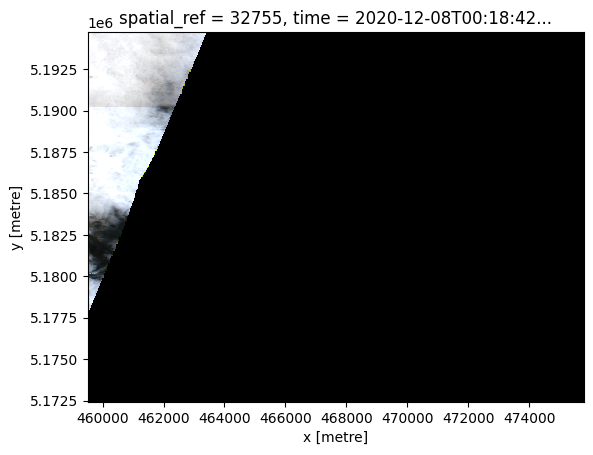

In [8]:
from pystac_client import Client
from odc.stac import load

client = Client.open("https://earth-search.aws.element84.com/v1")
collection = "sentinel-2-l2a"
tas_bbox = [146.5, -43.6, 146.7, -43.4]
search = client.search(collections=[collection], bbox=tas_bbox, datetime="2020-12")

data = load(search.items(), bbox=tas_bbox, groupby="solar_day", chunks={})
data[["red", "green", "blue"]].isel(time=2).to_array().plot.imshow(robust=True)

In [11]:
import requests

# Replace these variables with your actual values
instance_id = '1bcfffc9-2232-46a0-807a-b450dc32e35d'
api_key = 'your_api_key'
layer_id = 'your_layer_id'
bounding_box = 'min_lon,min_lat,max_lon,max_lat'
width = 512
height = 512
time = '2023-01-01/2023-12-31'  # Specify the time range

# Construct the WMS request URL
wms_url = f'https://services.sentinel-hub.com/ogc/wms/{instance_id}?SERVICE=WMS&REQUEST=GetMap&VERSION=1.3.0&FORMAT=image/jpeg&TRANSPARENT=false&LAYERS={layer_id}&STYLES=&CRS=EPSG:4326&BBOX={bounding_box}&WIDTH={width}&HEIGHT={height}&TIME={time}&apikey={api_key}'

# Make the API request
response = requests.get(wms_url)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    # Save the retrieved image
    with open('output_image.jpg', 'wb') as f:
        f.write(response.content)
    print('Image downloaded successfully.')
else:
    print(f'Error: {response.status_code}\n{response.text}')


Error: 400
<?xml version='1.0' encoding="UTF-8"?>
<ServiceExceptionReport version="1.3.0"
	xmlns="http://www.opengis.net/ogc"
	xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
	xsi:schemaLocation="http://www.opengis.net/ogc http://schemas.opengis.net/wms/1.3.0/exceptions_1_3_0.xsd">
	<ServiceException>
		<![CDATA[ Illegal BBOX format: min_lon,min_lat,max_lon,max_lat ]]>
	</ServiceException>
</ServiceExceptionReport>


In [9]:
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt